### naive bayes: spam classification

In [42]:
import pandas as pd
df = pd.read_csv("email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [2]:
df['Category'].value_counts()                             

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df.Message,df.Category, test_size=0.2,random_state=42)


In [4]:
X_train[4]

"Nah I don't think he goes to usf, he lives around here though"

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()
X_train_counts = v.fit_transform(X_train)
X_test_counts = v.transform(X_test)

In [6]:
len(X_train_counts.toarray()[2])

7754

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

### model evaluation :precision, recall, f1_score

In [10]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_counts)
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

           ham       0.99      0.99      0.99       958
          spam       0.97      0.92      0.95       157
{"mode":"full"       0.00      0.00      0.00         0

      accuracy                           0.98      1115
     macro avg       0.65      0.64      0.65      1115
  weighted avg       0.99      0.98      0.99      1115



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

### model training:confussion_metrics

TypeError: 'str' object is not callable

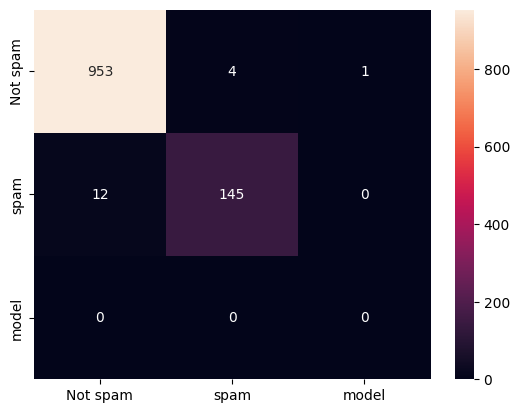

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt = "d", xticklabels = ['Not spam', 'spam','model'] , yticklabels = ['Not spam', 'spam','model'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion_matrix')
plt.show()


In [43]:
emails = [
    'Ok lar... Joking wif u oni...',
   'Free entry in 2 a wkly comp to win FA Cup fina...',
    'isActive:false}'
]
emails_count= v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam', 'spam'], dtype='<U14')

In [44]:
model.predict_proba(emails_count)


array([[9.99975171e-01, 2.37408646e-05, 1.08806595e-06],
       [2.79420523e-07, 9.99999721e-01, 2.40469188e-12],
       [4.57416831e-01, 5.15806323e-01, 2.67768460e-02]])

In [ ]:
### using pipeline

In [45]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('count_vectorizer',CountVectorizer()),
    ('nb_classifier', MultinomialNB())

])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report= classification_report(y_test,y_pred)
print(report)

                precision    recall  f1-score   support

           ham       0.99      0.99      0.99       958
          spam       0.97      0.92      0.95       157
{"mode":"full"       0.00      0.00      0.00         0

      accuracy                           0.98      1115
     macro avg       0.65      0.64      0.65      1115
  weighted avg       0.99      0.98      0.99      1115



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.